In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

In [79]:
HOME="/home/spoudel/All_Thesis/Thesis_program/Data"
project="shawnee"
location="location_1"

final_data_folder="final_data_to_train_on"

model_predicted_folder="KMeans"

In [80]:
folder=HOME+"/"+project+"/"+location
location_in_time=pd.read_csv(folder+"/location_in_time.csv")
passes=location_in_time["passID"].values
each_data=[pd.read_csv(folder+"/"+model_predicted_folder+f"/cluster_predicted_pass_{x}.csv") for x in location_in_time["passID"]]

predicted_data=pd.concat(each_data)
predicted_data

,Unnamed: 0,Unnamed: 0.1,timestamp,total_power,p0,p1,p2,p3,p4,p5,p6,cluster
0,0,0,2023-01-16 17:24:39.120000+00:00,100.000000,-2.000000,2.000000,2.000000,2.000000,2.000000,-0.272938,2.000000,3
1,1,1,2023-01-16 17:24:39.257000+00:00,30.908002,-2.000000,2.000000,1.456420,-0.565473,-0.569484,-0.296788,-0.267291,0
2,2,2,2023-01-16 17:24:39.384000+00:00,35.629787,-2.000000,2.000000,0.855925,-0.607730,-0.779575,-0.053831,1.538686,0
3,3,3,2023-01-16 17:24:39.511000+00:00,16.531542,-2.000000,1.243048,-0.668354,-0.669261,-0.469690,-1.085116,0.321046,0
4,4,4,2023-01-16 17:24:39.638000+00:00,30.659669,-2.000000,0.839832,-0.430652,-0.938489,-0.585273,0.070700,1.146457,0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,355,2023-01-16 17:31:08.215000+00:00,18.406951,0.619154,2.000000,-0.067383,-0.711903,-0.299709,-0.395371,-0.997861,2
356,356,356,2023-01-16 17:31:08.342000+00:00,67.584552,0.658804,0.218019,-0.212631,-0.182176,1.719183,1.880953,-0.183528,4
357,357,357,2023-01-16 17:31:08.469000+00:00,82.175854,0.966712,0.201359,0.004933,2.000000,0.814174,-0.509651,0.454917,3
358,358,358,2023-01-16 17:31:08.596000+00:00,100.000000,1.250349,-0.648439,1.299200,2.000000,-0.037076,-0.079023,1.638104,3


In [81]:
data_with_apc=pd.read_csv(folder+"/"+final_data_folder+"/"+f"data_pc_{project}_{location}.csv")
data_with_apc

,Unnamed: 0,Unnamed: 0.1,timestamp,total_power,p0,p1,p2,p3,p4,p5,p6,passID,latitude,longitude,prev_lat,prev_long,prev_pass,average_pass_count
0,1,1,2023-01-16 17:24:39.257000+00:00,30.908002,-2.000000,2.000000,1.456420,-0.565473,-0.569484,-0.296788,-0.267291,0,35.670008,-96.662316,35.670006,-96.662316,0.0,1.000000
1,2,2,2023-01-16 17:24:39.384000+00:00,35.629787,-2.000000,2.000000,0.855925,-0.607730,-0.779575,-0.053831,1.538686,0,35.670010,-96.662316,35.670008,-96.662316,0.0,1.000000
2,3,3,2023-01-16 17:24:39.511000+00:00,16.531542,-2.000000,1.243048,-0.668354,-0.669261,-0.469690,-1.085116,0.321046,0,35.670013,-96.662316,35.670010,-96.662316,0.0,1.000000
3,4,4,2023-01-16 17:24:39.638000+00:00,30.659669,-2.000000,0.839832,-0.430652,-0.938489,-0.585273,0.070700,1.146457,0,35.670015,-96.662316,35.670013,-96.662316,0.0,1.000000
4,5,5,2023-01-16 17:24:39.765000+00:00,26.623918,-1.905616,1.207969,0.279862,-0.889020,-0.640782,-0.274261,-0.467869,0,35.670017,-96.662316,35.670015,-96.662316,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,355,355,2023-01-16 17:31:08.215000+00:00,18.406951,0.619154,2.000000,-0.067383,-0.711903,-0.299709,-0.395371,-0.997861,4,35.670775,-96.662319,35.670773,-96.662319,4.0,3.444444
1801,356,356,2023-01-16 17:31:08.342000+00:00,67.584552,0.658804,0.218019,-0.212631,-0.182176,1.719183,1.880953,-0.183528,4,35.670778,-96.662319,35.670775,-96.662319,4.0,3.407407
1802,357,357,2023-01-16 17:31:08.469000+00:00,82.175854,0.966712,0.201359,0.004933,2.000000,0.814174,-0.509651,0.454917,4,35.670780,-96.662319,35.670778,-96.662319,4.0,3.520000
1803,358,358,2023-01-16 17:31:08.596000+00:00,100.000000,1.250349,-0.648439,1.299200,2.000000,-0.037076,-0.079023,1.638104,4,35.670782,-96.662319,35.670780,-96.662319,4.0,3.421053


In [82]:
merged_data=pd.merge(data_with_apc, predicted_data, how='left', left_on='timestamp', right_on='timestamp')
merged_data[["average_pass_count","cluster","passID"]]

,average_pass_count,cluster,passID
0,1.000000,0,0
1,1.000000,0,0
2,1.000000,0,0
3,1.000000,0,0
4,1.000000,0,0
...,...,...,...
1800,3.444444,2,4
1801,3.407407,4,4
1802,3.520000,3,4
1803,3.421053,3,4


In [83]:
px.scatter(
#     full_data[full_data["pass_no"]!=0],
    merged_data,
    x="latitude",
    y="longitude",
    hover_name="passID", 
    hover_data=["timestamp", "cluster"],
    color="cluster",
    width=1000,
    height=600,
    title=f"Cluster color map generated using {model_predicted_folder} in {project} {location}"
)

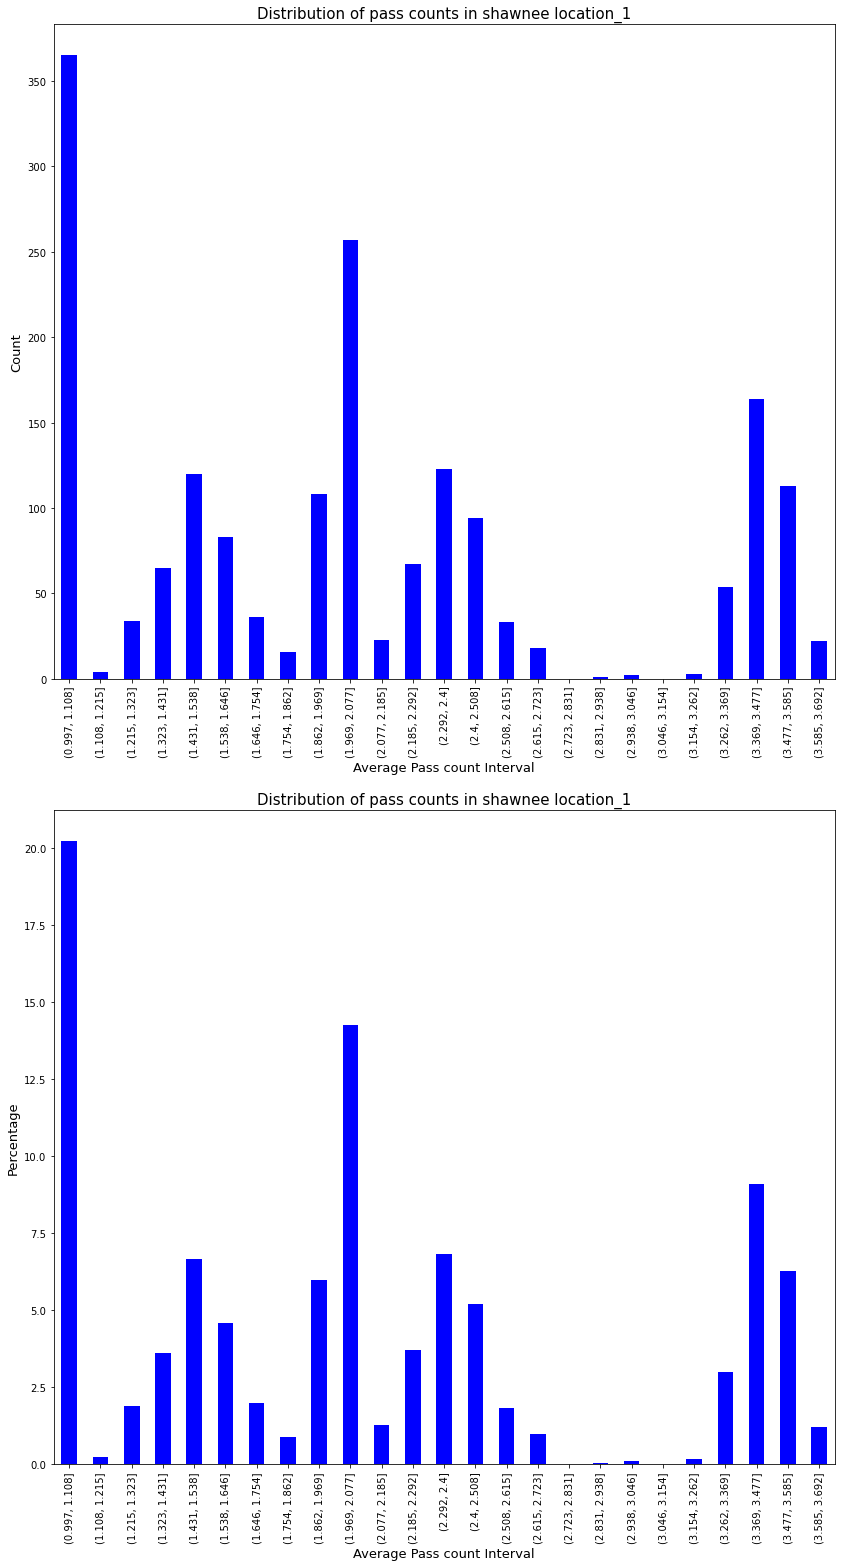

In [84]:
# max_apc=merged_data["average_pass_count"].max()
# total_data=len(merged_data)
# plt.figure(figsize=(30,10))
# n, bins, patches = plt.hist(x=merged_data["average_pass_count"], bins=50, color='#0504aa',
#                         alpha=0.7, rwidth=0.85)
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Average Pass count',fontsize=24)
# plt.ylabel('Frequency',fontsize=24)
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=24)
# plt.title(f"Distributtion of average pass count ",fontsize=30)
# maxfreq = n.max()
# # Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# plt.show()

df=merged_data.copy()
out=pd.cut(df['average_pass_count'], 25)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
plt.subplots_adjust(left=None, bottom=1, right=None, top=3, wspace=None, hspace=None)
plt.subplot(2,1,1)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(14,10))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.xticks(rotation=90)
plt.xlabel("Average Pass count Interval",fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.title(f"Distribution of pass counts in {project} {location}",fontsize=15)
plt.subplot(2,1,2)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(14,10))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.xticks(rotation=90)
plt.xlabel("Average Pass count Interval",fontsize=13)
plt.ylabel("Percentage",fontsize=13)
plt.title(f"Distribution of pass counts in {project} {location}",fontsize=15)
plt.show()
# maxfreq = n.max()
# Set a clean upper y-axis limit.
#     plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

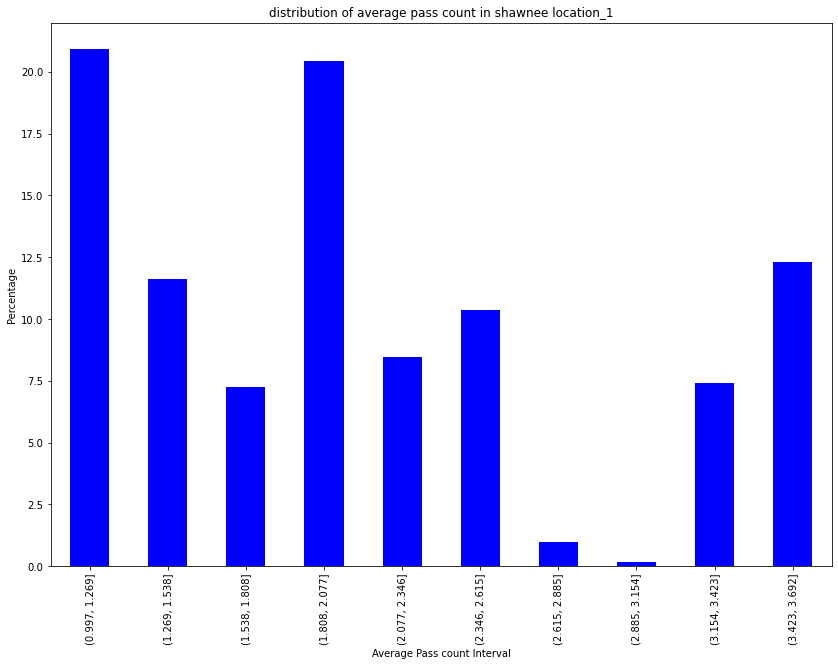

(0.997, 1.269]    378
(1.269, 1.538]    210
(1.538, 1.808]    131
(1.808, 2.077]    369
(2.077, 2.346]    153
(2.346, 2.615]    187
(2.615, 2.885]     18
(2.885, 3.154]      3
(3.154, 3.423]    134
(3.423, 3.692]    222
Name: average_pass_count, dtype: int64


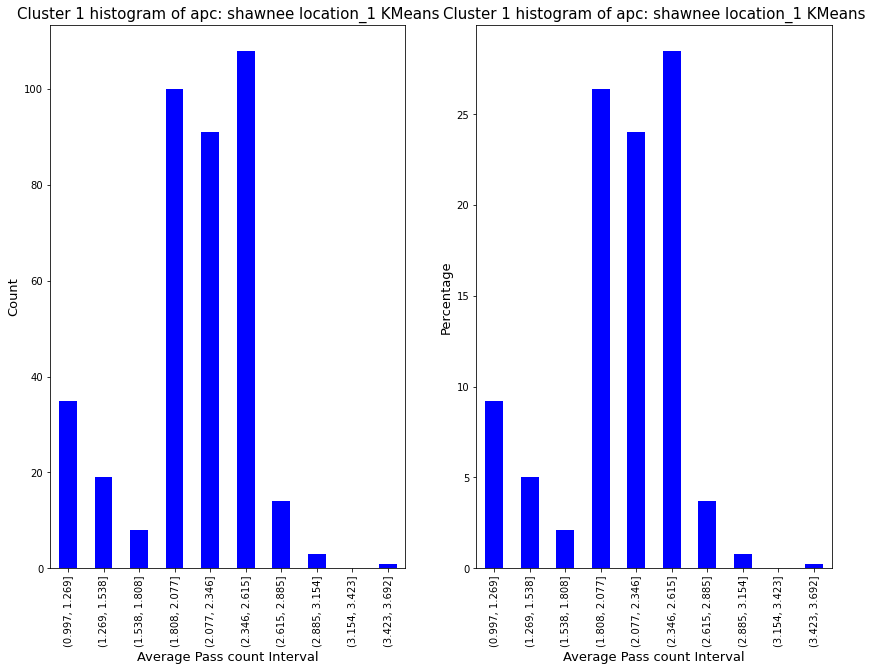

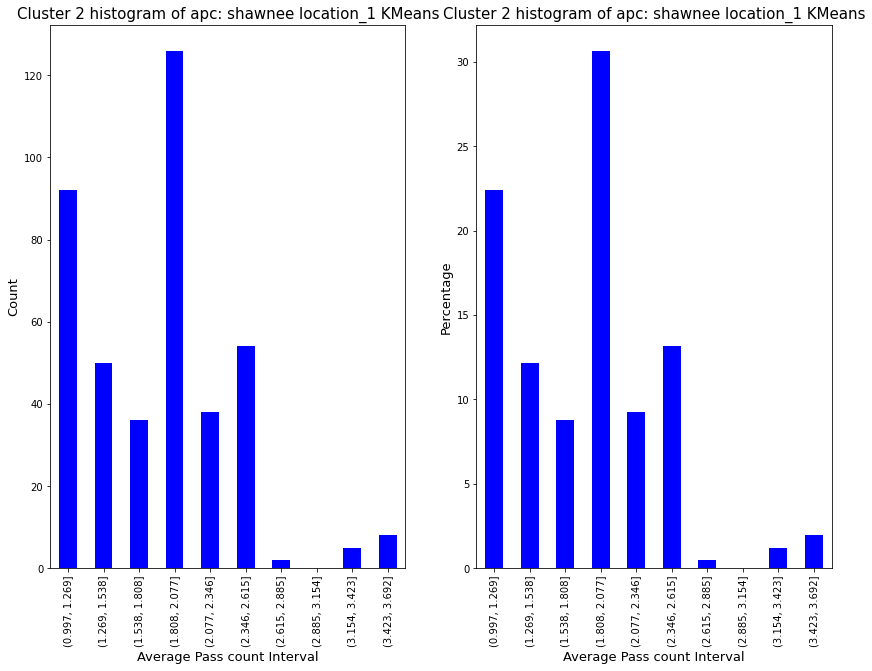

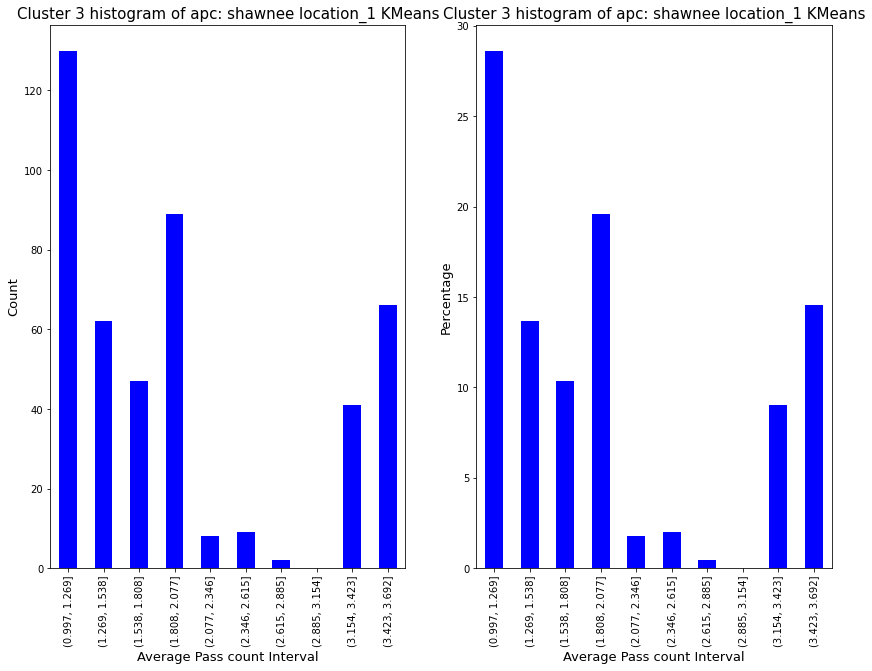

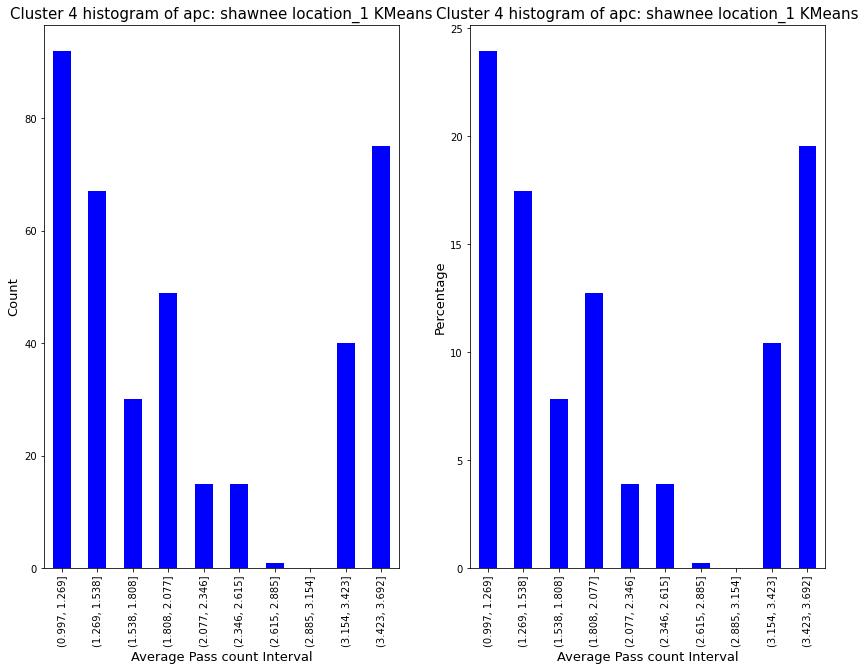

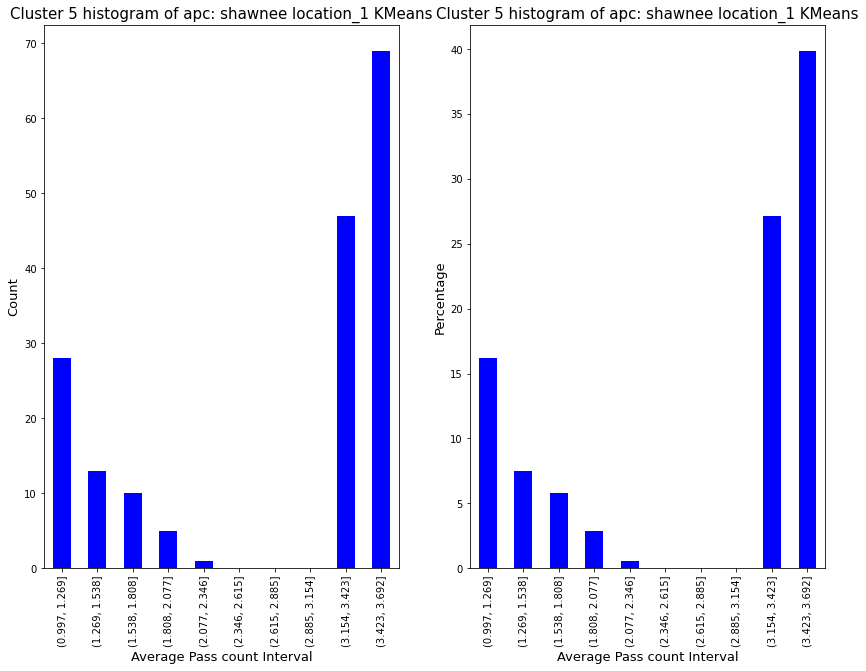

In [85]:
df=merged_data.copy()
out=pd.cut(df['average_pass_count'], 10)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(14,10))
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.xticks(rotation=90)
plt.xlabel("Average Pass count Interval")
plt.ylabel("Percentage")
plt.title(f"distribution of average pass count in {project} {location}")
plt.show()
print(out.value_counts(sort=False))



for i in np.sort(merged_data["cluster"].unique()):
    out=pd.cut(df[df["cluster"]==i]['average_pass_count'], out.cat.categories)
    out_norm = out.value_counts(sort=False, normalize=True).mul(100)
    
    plt.subplot(1,2,1)
    ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(14,10))
    # ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
    plt.xticks(rotation=90)
    plt.xlabel("Average Pass count Interval",fontsize=13)
    plt.ylabel("Count",fontsize=13)
    plt.title(f"Cluster {i+1} histogram of apc: {project} {location} {model_predicted_folder}",fontsize=15)
    plt.subplot(1,2,2)
    ax = out_norm.plot.bar(rot=0, color="b", figsize=(14,10))
    # ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
    plt.xticks(rotation=90)
    plt.xlabel("Average Pass count Interval",fontsize=13)
    plt.ylabel("Percentage",fontsize=13)
    plt.title(f"Cluster {i+1} histogram of apc: {project} {location} {model_predicted_folder}",fontsize=15)
    plt.show()
    # Set a clean upper y-axis limit.
#     plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()
    
# for i in np.sort(merged_data["passID"].unique()):
#     out=pd.cut(df[df["passID"]==i]['average_pass_count'], out.cat.categories)
#     out_norm = out.value_counts(sort=False, normalize=True).mul(100)
#     ax = out_norm.plot.bar(rot=0, color="b", figsize=(14,10))
#     # ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
#     plt.xticks(rotation=90)
#     plt.xlabel("Average Pass count Interval",fontsize=13)
#     plt.ylabel("Percentage",fontsize=13)
#     plt.title(f"For passID {i+1} histogram of apc for {project} {location}",fontsize=15)
#     plt.show()
#     maxfreq = n.max()
#     # Set a clean upper y-axis limit.
# #     plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#     plt.show()



0 2.093552138969371
1 1.8020188483683361
2 1.9517315320600706
3 2.0991172074242854
4 2.765774586854424


/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



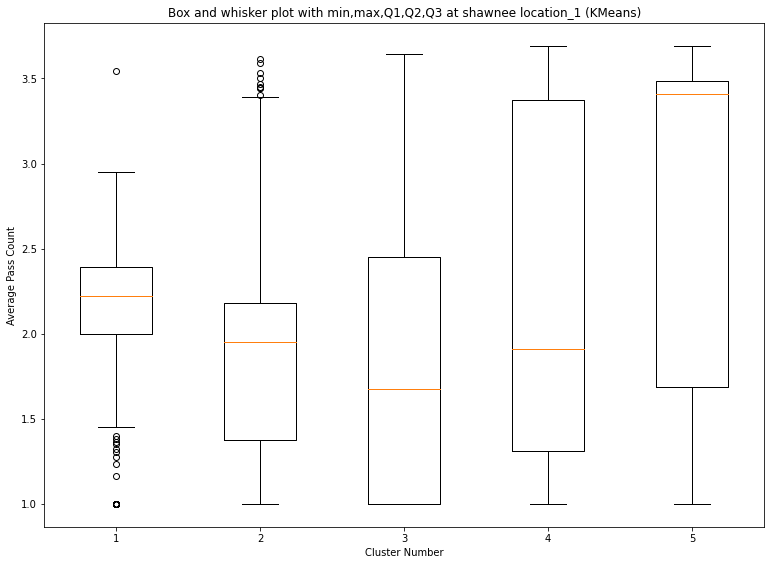

In [86]:
data_box_plot=[]
for i in np.sort(merged_data["cluster"].unique()):
    data=np.array(merged_data[merged_data["cluster"]==i]['average_pass_count'])
    print(i,np.average(data))
    data_box_plot.append(data)
    
fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data_box_plot)

plt.title(f"Box and whisker plot with min,max,Q1,Q2,Q3 at {project} {location} ({model_predicted_folder})")
plt.xlabel("Cluster Number")
plt.ylabel("Average Pass Count")

# show plot
plt.show()

In [87]:
np.quantile(np.array(merged_data[merged_data["cluster"]==4]['average_pass_count']),.5),np.mean(np.array(merged_data[merged_data["cluster"]==2]['average_pass_count']))

(3.4082491582491583, 1.9517315320600706)

In [88]:
np.mean(merged_data[merged_data["cluster"]==2]["average_pass_count"])

1.9517315320600725

(0.0, 6.0)

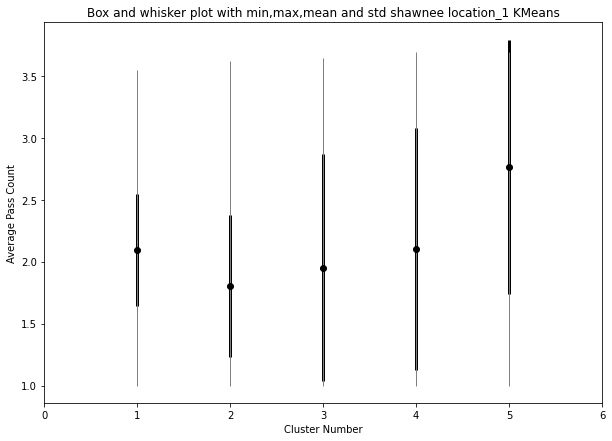

In [89]:
xes=[]
mins=[]
maxes=[]
means=[]
stds=[]
for i in np.sort(merged_data["cluster"].unique()):
    data=np.array(merged_data[merged_data["cluster"]==i]['average_pass_count'])
    xes.append(data)
    mins.append(data.min())
    maxes.append(data.max())
    means.append(data.mean())
    stds.append(data.std())


mean=np.array(means)
mins=np.array(mins)
maxes=np.array(maxes)
    
# create stacked errorbars:
fig = plt.figure(figsize =(10, 7))
plt.errorbar(np.arange(len(merged_data["cluster"].unique()))+1, means, stds, fmt='ok', lw=3)
plt.errorbar(np.arange(len(merged_data["cluster"].unique()))+1, means, [means - mins, maxes - means],
             fmt='.k', ecolor='gray', lw=1)
plt.title(f"Box and whisker plot with min,max,mean and std {project} {location} {model_predicted_folder}")
plt.xlabel("Cluster Number")
plt.ylabel("Average Pass Count")
plt.xlim(0, 6)

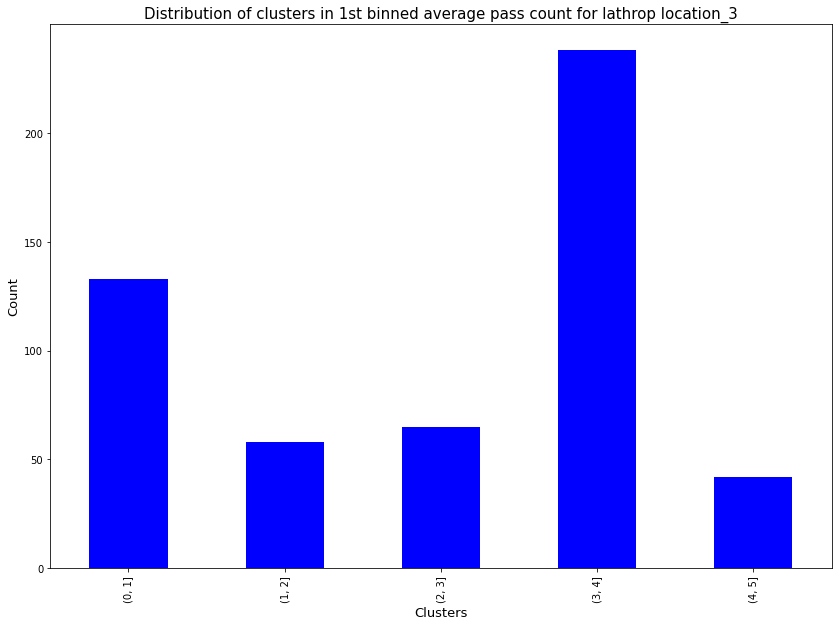

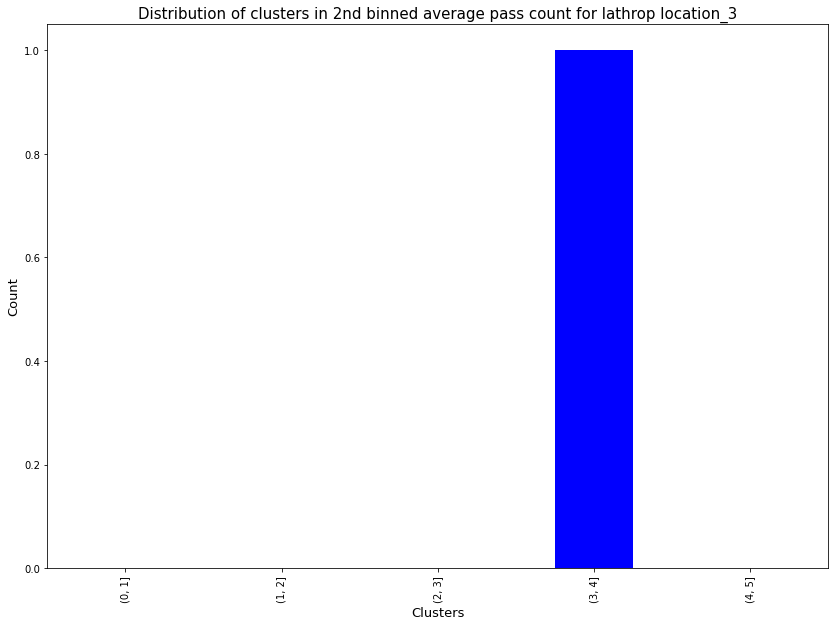

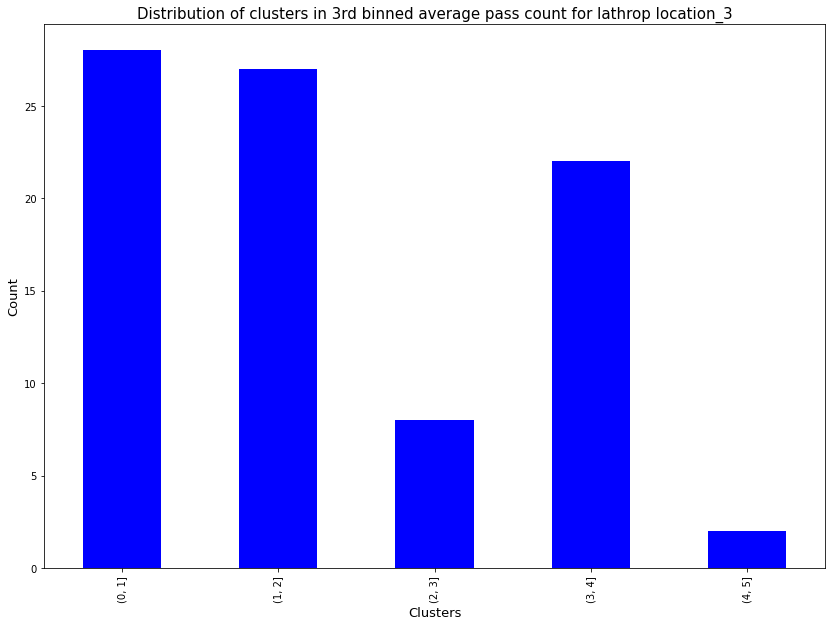

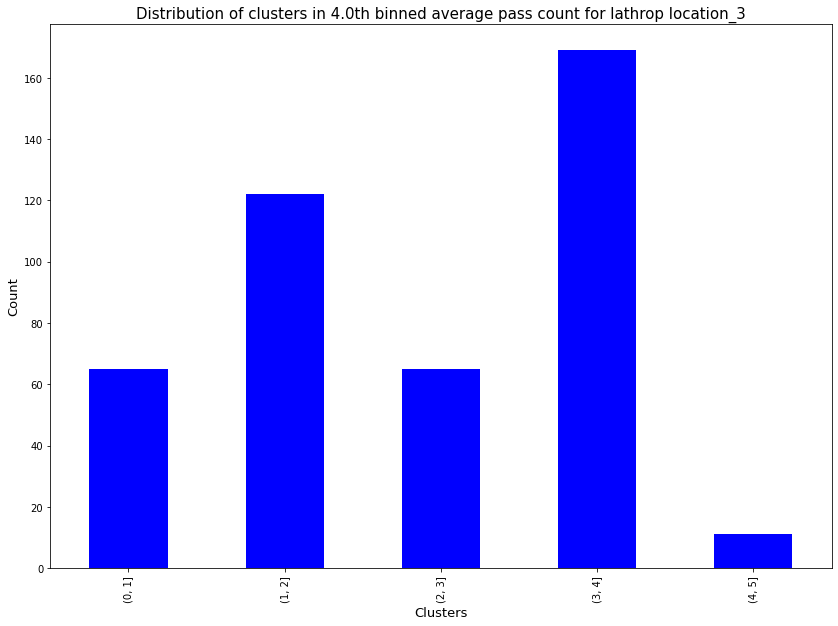

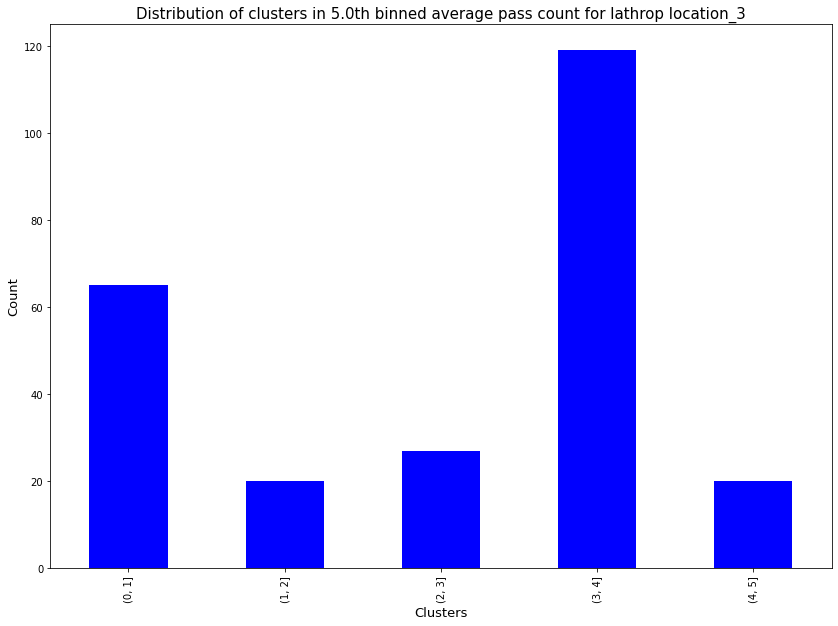

In [56]:
df=merged_data.copy()

def separate_into_n_classes(value):
    min_pc=1-0.0001
    max_pc=df["average_pass_count"].max()
    interval=(max_pc-min_pc)/len(df["cluster"].unique())
    return np.ceil((value-min_pc)/interval)

df["apc_cl"]=df["average_pass_count"].apply(lambda x: separate_into_n_classes(x))
df["cluster_p1"]=df["cluster"].apply(lambda x: x+1)
# df

for i in np.sort(df["apc_cl"].unique()):
    out=pd.cut(df[df["apc_cl"]==i]['cluster_p1'], [0,1,2,3,4,5])
    ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(14,10))
    # ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
    plt.xticks(rotation=90)
    plt.xlabel("Clusters",fontsize=13)
    plt.ylabel("Count",fontsize=13)
    if i==1:
        posi="1st"
    elif i==2:
        posi="2nd"
    elif i==3:
        posi="3rd"
    else:
        posi=f"{i}th"
    plt.title(f"Distribution of clusters in {posi} binned average pass count for {project} {location}",fontsize=15)
    plt.show()
#     plt.subplot(1,2,2)
#     ax = out_norm.plot.bar(rot=0, color="b", figsize=(14,10))
#     # ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
#     plt.xticks(rotation=90)
#     plt.xlabel("Average Pass count Interval",fontsize=13)
#     plt.ylabel("Percentage",fontsize=13)
#     plt.title(f"For cluster {i+1} histogram of apc for {project} {location}",fontsize=15)
#     plt.show()
#     maxfreq = n.max()
    # Set a clean upper y-axis limit.
#     plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()